#Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет [Mortality and Water Hardness](https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness)

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

#Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

*Построить точечный график

*Рассчитать коэффициенты корреляции Пирсона и Спирмена

*Построить модель линейной регрессии

*Рассчитать коэффициент детерминации

*Вывести график остатков

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
df = pd.read_csv('water.csv', index_col=0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

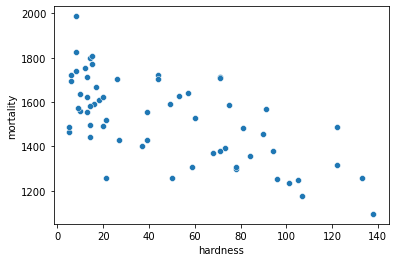

In [80]:
sns.scatterplot(data=df, x='hardness', y='mortality') #hardness mortality

In [81]:
df[['hardness', 'mortality']].corr() #Коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [82]:
df[['hardness', 'mortality']].corr(method='spearman') #Коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [83]:
X = df[['hardness']]
y = df['mortality']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train) #Cтроим модель линейной регрессии

LinearRegression()

In [85]:
model.score(X_test, y_test) #Возвращаем значение коэффициента детерминации

0.23374928387625848

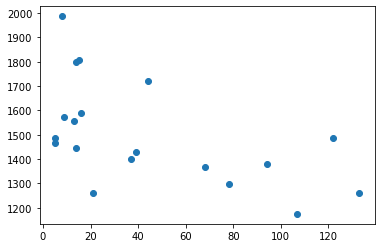

In [86]:
plt.scatter(X_test, y_test) #График остатков

#Задание 2. Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

*Разделить данные на 2 группы

*Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [87]:
south = df[df['location'] == 'South']
north = df[df['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

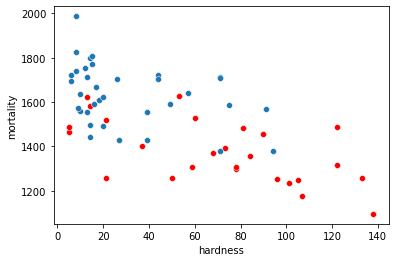

In [88]:
sns.scatterplot(data=south, x='hardness', y='mortality', color='red')
sns.scatterplot(data=north, x='hardness', y='mortality')

In [89]:
south[['hardness', 'mortality']].corr() 

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [90]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [91]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [92]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [93]:
Xs, Xn = south[['hardness']], north[['hardness']]
ys, yn = south['mortality'], north[['mortality']]

In [94]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30, random_state=15)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.30, random_state=20)

In [95]:
model2 = LinearRegression()
model2.fit(Xs_train, ys_train)

LinearRegression()

In [96]:
model2.score(Xs_test, ys_test)

0.11957071465163671

In [97]:
model3 = LinearRegression()
model3.fit(Xs_train, ys_train)

LinearRegression()

In [98]:
model3.score(Xs_test, ys_test)

0.11957071465163671

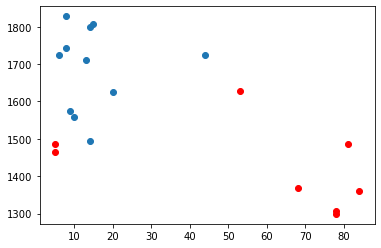

In [101]:
plt.scatter(Xs_test, ys_test, color='red')
plt.scatter(Xn_test, yn_test)

Зависимость Северных и Южных городов отличается.

*Смертность в Южных городах ниже, чем в Северных. 
*Концентрация кальция в Южных городах выше, чем в Северных.